# Исследование объявлений о продаже квартир

Представлен архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет.
Нужно научиться определять рыночную стоимость объектов недвижимости. 
Задача — установить параметры. 
Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

### Шаг 1. Открыть файл с данными и изучить общую информацию
Путь к файлу: /datasets/real_estate_data.csv. 
### Шаг 2. Предобработка данных
### Шаг 3. Посчитать и добавить в таблицу:
* цену квадратного метра;
* день недели, месяц и год публикации объявления;
* этаж квартиры; варианты — первый, последний, другой;
* соотношение жилой и общей площади, а также отношение площади кухни к общей.

### Шаг 4. Провести исследовательский анализ данных и выполнить пункты:
* Изучить  параметры: площадь, цена, число комнат, высота потолков. Построить гистограммы.
* Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. 
* Уберать редкие и выбивающиеся значения. 
* Какие факторы больше всего влияют на стоимость квартиры? 
* Выберать 10 населённых пунктов с наибольшим числом объявлений. Посчитать среднюю цену квадратного метра в этих населённых пунктах. Выделить населённые пункты с самой высокой и низкой стоимостью жилья. 
* Изучить предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделить квартиры в Санкт-Петербурге. Задача — выяснить, какая область входит в центр. 
* Выделить сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделить факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделать выводы. Отличаются ли они от общих выводов по всему городу?

### Шаг 5. Написать общий вывод

### Описание данных
* airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
* balcony — число балконов
* ceiling_height — высота потолков (м)
* cityCenters_nearest — расстояние до центра города (м)
* days_exposition — сколько дней было размещено объявление (от публикации до снятия)
* first_day_exposition — дата публикации
* floor — этаж
* floors_total — всего этажей в доме
* is_apartment — апартаменты (булев тип)
* kitchen_area — площадь кухни в квадратных метрах (м²)
* last_price — цена на момент снятия с публикации
* living_area — жилая площадь в квадратных метрах(м²)
* locality_name — название населённого пункта
* open_plan — свободная планировка (булев тип)
* parks_around3000 — число парков в радиусе 3 км
* parks_nearest — расстояние до ближайшего парка (м)
* ponds_around3000 — число водоёмов в радиусе 3 км
* ponds_nearest — расстояние до ближайшего водоёма (м)
* rooms — число комнат
* studio — квартира-студия (булев тип)
* total_area — площадь квартиры в квадратных метрах (м²)
* total_images — число фотографий квартиры в объявлении
Пояснение: апартаменты — это нежилые помещения, не относящиеся к жилому фонду, но имеющие необходимые условия для проживания.

### Шаг 1. Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
#import numpy as np
from collections import defaultdict

In [2]:
real_estate_data = pd.read_csv("/datasets/real_estate_data.csv", sep="\t") 
real_estate_data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


In [3]:
display(real_estate_data)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,NaN,...,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,...,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,...,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,NaN,12,NaN,...,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


### Бросаются в глаза возможные аномалии:
- объявления без фото
- объявления с 0 комнат
- разброс цен на 4 порядка
- высота потолков в 100 метров
- жилая площадь в 2 метра
- площадь кухни 112 метров
- ближайший аэропорт в 84 тыс м (так бывает?)
- расстояние до центра города - 65 тыс м(тоже не влезает в земной шар)
- расстояние до парка - 3 тыс м
- время размещения - до 1,589 дней

### Посмотрим пустые значения

In [4]:
print(real_estate_data.isnull().sum().sort_values(ascending=False))

is_apartment            20924
parks_nearest           15620
ponds_nearest           14589
balcony                 11519
ceiling_height           9195
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
ponds_around3000         5518
days_exposition          3181
kitchen_area             2278
living_area              1903
floors_total               86
locality_name              49
first_day_exposition        0
last_price                  0
total_area                  0
studio                      0
rooms                       0
floor                       0
open_plan                   0
total_images                0
dtype: int64


### Пропущены данные в столбцах:

Параметры квартиры:
- is_apartment — апартаменты (булев тип). Параметр про апартаменты видимо введен недавно и заполнен по небольшому количеству объявлений
- ceiling_height — высота потолков (м). Возможные причины - поле необязательное, ошибка в обработке данных.
- floors_total — всего этажей в доме
- living_area — жилая площадь в квадратных метрах(м²). Возможные причины - необязательный параметр, ошибка в обработке данных.
- kitchen_area — площадь кухни в квадратных метрах (м²). Возможные причины = кухня отсутствует, просто не заполнили, ошибка в обработке данных.
- balcony — число балконов. Возможные причины - балкон отсутствует, просто не заполнили, ошибка в обработке данных.

Параметры объявления:
- days_exposition — сколько дней было размещено объявление (от публикации до снятия). не заполнили дату публикации или дату снятия, ошибка в обработке данных.

Параметры инфраструктуры:
- airports_nearest — расстояние до ближайшего аэропорта в метрах (м). Возможные причины - нет аэропорта поблизости, расстояние не известно, просто не заполнили, ошибка в обработке данных.
- cityCenters_nearest — расстояние до центра города (м). Возможные причины - нет центра поблизости, расстояние не известно, просто не заполнили, ошибка в обработке данных.
- parks_around3000 — число парков в радиусе 3 км. Возможные причины - нет парка в радиусе 3 м, расстояние не известно, просто не заполнили, ошибка в обработке данных.
- parks_nearest — расстояние до ближайшего парка (м). Возможные причины - нет парка, расстояние не известно, просто не заполнили, ошибка в обработке данных.
- ponds_around3000 — число водоёмов в радиусе 3 км
- ponds_nearest — расстояние до ближайшего водоёма (м)

### Варианты обработки пропусков
Критичным для проекта могут быть пропуски в полях, которые требуется проанализировать:
высота потолков, удалённость от центра, время продажи квартиры, жилая площадь, площадь кухни. 

Высоту потолков заполнять не будем.
Площадь кухни и жилую площадь можно вычислить либо взять средние значения.
Время продажи квартиры - нет данных, на основе которых можно заполнить.

### Посмотрим типы данных

In [5]:
print(real_estate_data.info())
pd.set_option('display.max_columns', 30) 
display(real_estate_data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,NaN,False,False,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,False,False,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,False,False,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,NaN,12,NaN,False,False,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


### Вывод
- first_day_exposition    23699 non-null object - должна быть дата
- is_apartment            2775 non-null object - должен быть булевый тип
- balcony — число балконов - должно быть целым числом

## Шаг 2. Предобработка данных

### Меняем тип данных для столбцов:
- балконы - чтобы можно было делать математические операции
- дату публикации - так как нужно будет работать с ней как с датой
- is_apartment - заполнен как bool, тип должен быть другой


### Заполняем пропущенные значения
В расчетах потребуются:
- цену квадратного метра - для этого нужны цена и площадь;
- день недели, месяц и год публикации объявления;
- этаж квартиры; варианты — первый, последний, другой;
- соотношение жилой и общей площади, а также отношение площади кухни к общей.

В исследовательском анализе данных потребуются 
площадь, 
цена, 
число комнат, 
высота потолков.
Их из заполнения исключаем и отмечаем //.

Отмечаем что может потребоваться заполнить:
- airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
*balcony — число балконов*
- ceiling_height — высота потолков (м)
- cityCenters_nearest — расстояние до центра города (м)
- days_exposition — сколько дней было размещено объявление (от публикации до снятия)
- first_day_exposition — дата публикации
- floor — этаж
*floors_total — всего этажей в доме* (пропусков мало, можно оставить без заполнения)
- is_apartment — апартаменты (булев тип)

//*kitchen_area — площадь кухни в квадратных метрах (м²)*

//*last_price — цена на момент снятия с публикации*

//*living_area — жилая площадь в квадратных метрах(м²)*
- locality_name — название населённого пункта
- open_plan — свободная планировка (булев тип)
- parks_around3000 — число парков в радиусе 3 км
- parks_nearest — расстояние до ближайшего парка (м)
- ponds_around3000 — число водоёмов в радиусе 3 км
- ponds_nearest — расстояние до ближайшего водоёма (м)
- rooms — число комнат
- studio — квартира-студия (булев тип)

//*total_area — площадь квартиры в квадратных метрах (м²)*
- total_images — число фотографий квартиры в объявлении

### Заполним пустые значения в балконах. 
### Признак апартаментов конвертируем в bool
### Преобразуем в дату first_day_exposition 

In [6]:
## Заполняем пустые значения балконов 0 и преобразуем в целый тип данных
real_estate_data['balcony'] = real_estate_data['balcony'].fillna('0').astype('int64')

# Преобразуем признак апартаментов в bool
real_estate_data['is_apartment'] = real_estate_data['is_apartment'].astype('bool')

## Преобразуем тип данных в дате публикации в дату
real_estate_data['first_day_exposition'] = pd.to_datetime(real_estate_data['first_day_exposition'], format='%Y.%m.%d %H:%M:%S')

print(real_estate_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null datetime64[ns]
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            23699 non-null bool
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 23699 non-null int64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_arou

## Восстановить площадь жилого пространства

## Восстановить площадь кухни

### Возьмем среднюю долю жилого пространства от общей площади. Умножим общую площадь на эту долю и заполним полученным значением пропущенные поля 

In [7]:
living_area_part = real_estate_data['living_area'].mean()/real_estate_data['total_area'].mean()
print(living_area_part)

real_estate_data['living_area'] = real_estate_data['living_area'].fillna(real_estate_data['total_area'] * living_area_part)

0.5709796633031937


In [8]:
real_estate_data['living_area'].describe()

count    23699.000000
mean        34.594076
std         22.354668
min          2.000000
25%         19.000000
50%         30.000000
75%         42.100000
max        409.700000
Name: living_area, dtype: float64

### Вычислим площадь кухни, вычтем из общей площади жилую площадь

In [9]:
real_estate_data['kitchen_area'] = real_estate_data['total_area'] - real_estate_data['living_area']

# Это план Б по заполнению площади кухни
#kitchen_area_part = real_estate_data['kitchen_area'].mean()/real_estate_data['total_area'].mean() 
#print(kitchen_area_part)
#real_estate_data['kitchen_area'] = real_estate_data['kitchen_area'].fillna(real_estate_data['total_area'] * kitchen_area_part)

In [10]:
real_estate_data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [11]:
real_estate_data['kitchen_area'].describe()

count    23699.000000
mean        25.754575
std         16.212098
min          0.000000
25%         17.000000
50%         22.000000
75%         29.100000
max        490.300000
Name: kitchen_area, dtype: float64

## Шаг 3. Посчитайте и добавьте в таблицу

### цену квадратного метра - meter_price

In [12]:
real_estate_data['meter_price'] = real_estate_data['last_price']/real_estate_data['total_area']

In [13]:
real_estate_data[['meter_price','last_price','total_area']].sample()

,meter_price,last_price,total_area
6329,138392.857143,15500000.0,112.0


### день недели, месяц и год публикации объявления 
- exposition_year
- exposition_month
- exposition_day_of_week

In [14]:
#data['day_exposition'] 
real_estate_data['exposition_year'] = real_estate_data['first_day_exposition'].apply(lambda x: x.year)
real_estate_data['exposition_month'] = real_estate_data['first_day_exposition'].apply(lambda x: x.month)
real_estate_data['exposition_day_of_week'] = real_estate_data['first_day_exposition'].dt.dayofweek

print(real_estate_data[['exposition_year','exposition_month', 'exposition_day_of_week']].sample())
print(real_estate_data['floor'].sample(5))

      exposition_year  exposition_month  exposition_day_of_week
2655             2018                 7                       4
15002    8
15213    7
1107     5
23411    1
15969    1
Name: floor, dtype: int64


### этаж квартиры; варианты — первый, последний, другой;
floor_type

In [15]:
def define_floor_type(floor,floors_total):
    if floor == 1:
        return 'первый'
    if floor == floors_total:
         return 'последний'
    else:
        return 'другой'
    
real_estate_data['floor_type'] = real_estate_data.apply(lambda x: define_floor_type(x['floor'], x['floors_total']), axis =  1)

print(real_estate_data['floor_type'].sample(5))

8506     другой
8770     другой
22647    другой
870      первый
19628    другой
Name: floor_type, dtype: object


In [16]:
real_estate_data['floor_type'].value_counts()

другой       17446
последний     3336
первый        2917
Name: floor_type, dtype: int64

### соотношение жилой и общей площади, а также отношение площади кухни к общей
Исходные столбцы:
//*kitchen_area — площадь кухни в квадратных метрах (м²)*
//*total_area — площадь квартиры в квадратных метрах (м²)*
//*living_area — жилая площадь в квадратных метрах(м²)*

Считаем:
- living_total_area - соотношение жилой и общей площади
- kitchen_total_area - соотношение площади кухни к большей

In [17]:
real_estate_data['living_total_area'] = real_estate_data['living_area']/real_estate_data['total_area']
real_estate_data['kitchen_total_area'] = real_estate_data['kitchen_area']/real_estate_data['total_area']
print(real_estate_data[['living_total_area', 'kitchen_total_area']].sample(5))

       living_total_area  kitchen_total_area
2260            0.623874            0.376126
5979            0.514706            0.485294
19958           0.473684            0.526316
7785            0.570980            0.429020
11565           0.571429            0.428571


## Шаг 4. Проведите исследовательский анализ данных и выполните инструкции:

### Изучите следующие параметры: площадь, цена, число комнат, высота потолков. Постройте гистограммы для каждого параметра.

### 1.Площадь

In [18]:
real_estate_data['total_area'].describe()

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

#### Подчистим площадь от крайних значений

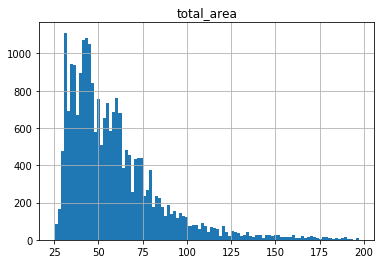

In [19]:
real_estate_data.hist('total_area', bins=100, range=(real_estate_data.total_area.quantile(0.01), real_estate_data.total_area.quantile(0.99)))
plt.show()

#### Гистограмма выглядит правдоподобно

### 2.Цена

In [20]:
real_estate_data['last_price'].describe()

count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

### убираем совсем огромные значения цены - более 95 персентиля и менее 1 персентиля

1000000.0 15300000.0


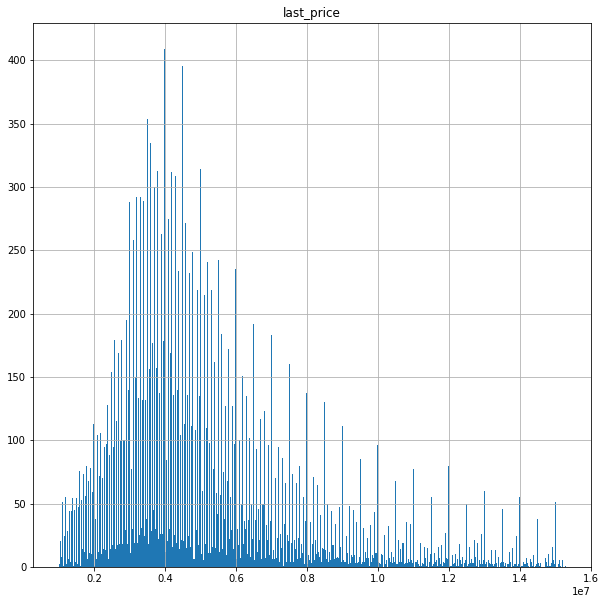

In [21]:
lower_board = real_estate_data.last_price.quantile(0.01)
higher_board = real_estate_data.last_price.quantile(0.95)

print(lower_board, higher_board)

data_mean_price = real_estate_data.query('last_price < @higher_board and last_price > @lower_board')
data_mean_price.hist('last_price', bins=500, range=(lower_board, higher_board), figsize=(10, 10))
plt.show()

#### Гистограмма цены выглядит правдоподобно

### 3. Число комнат

### Чистим данные:
- Убираем совсем огромные значения более 99 персентиля
- Квартиры с 0 комнат это студии, это значение не меняем. Проверим сколько квартир с заполненной комнатой и отметкой Студия
- Для чистоты гистограммы лучше игнорировать найденные записи с заполненным значением "количество комнат" и studio = True
- Поставим верхнюю границу разумного количества комнат

Отфильтруем квартиры-студии с заполненным полем Комната - 11
Показываем гистрограмму для квартир с количеством комнат, меньшим чем - 8.0


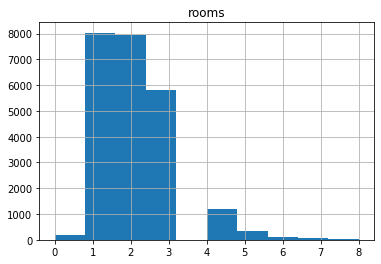

In [22]:
data_studio = real_estate_data.query('studio == True and rooms !=0')
print("Отфильтруем квартиры-студии с заполненным полем Комната -",len(data_studio))


higher_board = real_estate_data.rooms.quantile(0.999)
print('Показываем гистрограмму для квартир с количеством комнат, меньшим чем -', higher_board)

data_rooms_cleaned = real_estate_data.query('studio == True and rooms ==0 or studio == False')
data_rooms_cleaned.hist('rooms',  range=(0, higher_board))
plt.show()

### Высота потолков. Постройте гистограммы для каждого параметра.

In [23]:
real_estate_data['ceiling_height'].describe()

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

 ### Уберем явно неверно указанную высоту потолков:
    - если потолки ниже 2,5 м, установим высоту в 2,5 
    - если потолки выше 5м, установим высоту в 5 м

In [24]:
def ceiling_height_normalize(height):
    if height > 5:
        height = 5
    if height < 2.5:
        height = 2.5
    return height
real_estate_data['ceiling_height'] = real_estate_data['ceiling_height'].apply(ceiling_height_normalize)   

real_estate_data['ceiling_height'].describe()

count    14504.000000
mean         2.731755
std          0.293150
min          2.500000
25%          2.520000
50%          2.650000
75%          2.800000
max          5.000000
Name: ceiling_height, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f025fc9f610>]],
      dtype=object)

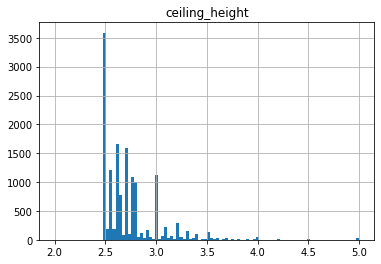

In [25]:
real_estate_data.hist('ceiling_height', bins=100, range=(2,real_estate_data['ceiling_height'].max()))

### Гистограмма высоты потолков правоподобна. Нет значений меньеш 2,5 метров, могут быть какие-то редкие квартиры с высотой до 5 м

### Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?
days_exposition — сколько дней было размещено объявление (от публикации до снятия)

In [27]:
real_estate_data['days_exposition'].describe()

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

### Сделаем словарь значений, описывающий время продажи квартиры

In [28]:
days_exposition_dict = real_estate_data['days_exposition'].describe().to_dict()
days_exposition_dict

{'count': 20518.0,
 'mean': 180.88863436982163,
 'std': 219.72798815035284,
 'min': 1.0,
 '25%': 45.00000000000001,
 '50%': 95.0,
 '75%': 232.0,
 'max': 1580.0}

In [29]:
real_estate_data['days_exposition'].median()

95.0

### Среднее время продажи - 180 дней. Медиана - 95.
mean       180.888634
median - 95
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000

- Первый и третий квантиль выглядят приемлемо.
- Минимальное значение = 1.Из общей практики - редкость, когда продажа квартиры занимает менее 1 недели. Если смотреть на статистику - в первом квантиле (25%) - продажа квартиры занимает 450 дней. Стандартное отклонение - 219. То есть значений, выходящих за стандартное отклонение, тут нет. Поэтому менять значение не буду.
- Максимальное значение - 1580.Из общей практики - редко когда объявление о продаже бывает актуальным более года.Для регионов с нормальным спросом на жилье этот показатель редко превышает 6 месяцев. Однако в нашей выборке регионов много, поэтому возьмем 3 квартиль + стандартное отклонение как нашу максимульную границу.

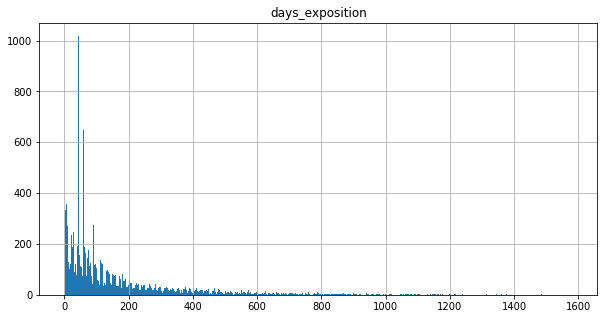

In [30]:
real_estate_data.hist('days_exposition', bins=1000,  figsize=(10, 5))
plt.show()

## Гистограмма времени размещения

- На гистрограмме есть два явный выброс - более 750 значений. 
- Гистограмма сильно растянута вправо - есть очень длинные сроки размещения.
- Поработаем с необычно долгим временем продажи.

### Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили.

#### Смотрим максимально часто встречающиеся значения даты размещения

In [31]:
print(real_estate_data['days_exposition'].value_counts(ascending=False).head(10))

45.0    880
60.0    538
7.0     234
30.0    208
90.0    204
4.0     176
3.0     158
5.0     152
14.0    148
9.0     143
Name: days_exposition, dtype: int64


### Частые значения времени размещения объявлений
- Похоже, в 45 и 60 дней происходит какое-то автоматическое закрытие, так как эти значения в 2 и почти в 3 раза больше, чем остальные.
- Если присмотреться, следующие по частоте - 7, 30 и 90 дней имею очень близкие значения. 
- Для подведения итогов предположу, что есть стандартный срок размещения, со значениями 7, 30, 46, 60 и 90 дней, и из них чаще всего выбирают 45 и 60. Не буду считать их выбивающимися и убирать.

In [32]:
print(real_estate_data['days_exposition'].value_counts(ascending=True).head(10))

773.0     1
693.0     1
951.0     1
1049.0    1
1110.0    1
1135.0    1
1441.0    1
1255.0    1
996.0     1
1182.0    1
Name: days_exposition, dtype: int64


### Редко встречающиеся значения времени размещения объявления
- Если посмотреть на самые редко встречающиеся значения - это очень долгие сроки размещения, явно больше года.
- Похоже, про эти объявления забыли. Их можно подчистить.
- Выбираю для очистки зачения по правилу: 3 квартиль + стандартное отклонение. Считаю, что все, что больше - редкие брошенные объявления. Заменяю в них время размещения на максимально выбранное по правилу.

In [33]:
def days_exposition_normalize(days_exposition):
    higher_board = days_exposition_dict['std'] + days_exposition_dict['75%']
    if days_exposition > higher_board:
        days_exposition = higher_board
    return days_exposition

real_estate_data['days_exposition'] = real_estate_data['days_exposition'].apply(days_exposition_normalize)   

real_estate_data['days_exposition'].describe()

count    20518.000000
mean       154.398083
std        144.797193
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max        451.727988
Name: days_exposition, dtype: float64

#### Ну вот, максимальное значение размещения подчистили. 

### Быстрая vs долгая сделка
- Пусть сделка считается прошедшей быстро, если срок размещения приходится на 1 квартиль - менее 45 дней.
- И сделка считается прошедшей долго, если срок размещения в 4 квартиле - более 232 дней.

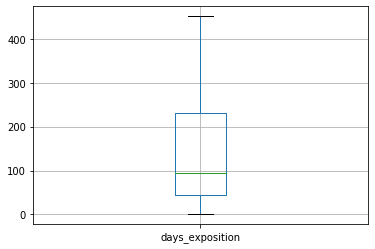

In [81]:
real_estate_data.boxplot('days_exposition')

Выбросов на графике ящика с усами нем нет, в отличие от графика с ценой. 

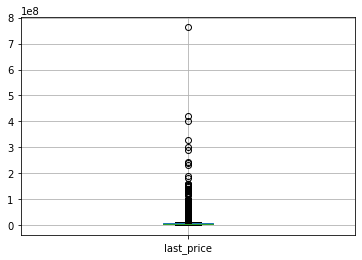

In [82]:
real_estate_data.boxplot('last_price')

Точки - это выбросы и их стоит удалить, т.к. они сильно влияют на результат. Анализировать обычное жилье совместно с элитным не имеет смысла. 

## Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от квадратного метра, числа комнат, этажа (первого или последнего), удалённости от центра. 

### Категоризируем общую площадь на квартили, чтобы сравнивать  с другими параметрами

In [34]:
total_area_dict = real_estate_data['total_area'].describe().to_dict()

In [35]:
total_area_dict

{'count': 23699.0,
 'mean': 60.34865099793241,
 'std': 35.654082903371624,
 'min': 12.0,
 '25%': 40.0,
 '50%': 52.0,
 '75%': 69.9,
 'max': 900.0}

In [36]:
def total_area_group(total_area):
    if  total_area_dict['min'] <= total_area <= total_area_dict['25%']:
        return ('От {} до {}'.format(total_area_dict['min'], total_area_dict['25%']))
    if  total_area_dict['25%'] < total_area <= total_area_dict['50%']:
        return ('От {} до {}'.format(total_area_dict['25%'], total_area_dict['50%']))
    if  total_area_dict['50%'] < total_area <= total_area_dict['75%']:
        return ('От {} до {}'.format(total_area_dict['50%'], total_area_dict['75%']))
    if  total_area_dict['75%'] < total_area < (total_area_dict['75%'] 
                                               +total_area_dict['std']):
        return ('От {} до {:.2f}'.format(total_area_dict['75%'], total_area_dict['75%'] + total_area_dict['std']))
    return ('От_  {:.2f}'.format(total_area_dict['75%'] + total_area_dict['std']))
real_estate_data['total_area_group'] = real_estate_data['total_area'].apply(total_area_group)

In [37]:
print(real_estate_data['total_area_group'].unique())

['От_  105.55' 'От 40.0 до 52.0' 'От 52.0 до 69.9' 'От 69.9 до 105.55'
 'От 12.0 до 40.0']


In [38]:
real_estate_data.groupby('total_area_group').agg({'last_price': ['mean', 'median']})

last_price            
                           mean      median
total_area_group                           
От 12.0 до 40.0    3.318415e+06   3300000.0
От 40.0 до 52.0    4.149565e+06   4100000.0
От 52.0 до 69.9    5.485343e+06   5300000.0
От 69.9 до 105.55  8.691569e+06   7900000.0
От_  105.55        2.560088e+07  16900000.0

#### Рост общей площади сопровождается ростом стоимости, что закономерно

### Категоризируем стоимость квартиры, чтобы сравнивать с общей площадью и числом комнат

In [39]:
last_price_dict = real_estate_data['last_price'].describe().to_dict()
last_price_dict

{'count': 23699.0,
 'mean': 6541548.771551542,
 'std': 10887013.26754464,
 'min': 12190.0,
 '25%': 3400000.0,
 '50%': 4650000.0,
 '75%': 6800000.0,
 'max': 763000000.0}

In [40]:
def last_price_grouped(last_price):
    if  last_price_dict['min'] <= last_price <= last_price_dict['25%']:
        return ('От {} до {}'.format(last_price_dict['min'], last_price_dict['25%']))
    if  last_price_dict['25%'] < last_price <= last_price_dict['50%']:
        return ('От {} до {}'.format(last_price_dict['25%'], last_price_dict['50%']))
    if  last_price_dict['50%'] < last_price <= last_price_dict['75%']:
        return ('От {} до {}'.format(last_price_dict['50%'], last_price_dict['75%']))
    if  last_price_dict['75%'] < last_price < (last_price_dict['75%'] 
                                               +last_price_dict['std']):
        return ('От {} до {:.2f}'.format(last_price_dict['75%'], last_price_dict['75%'] + last_price_dict['std']))
    return ('От_  {:.2f}'.format(last_price_dict['75%'] + last_price_dict['std']))
real_estate_data['last_price_group'] = real_estate_data['last_price'].apply(last_price_grouped)

In [41]:
print(real_estate_data['last_price_group'].unique())

['От 6800000.0 до 17687013.27' 'От 12190.0 до 3400000.0'
 'От 4650000.0 до 6800000.0' 'От_  17687013.27'
 'От 3400000.0 до 4650000.0']


In [42]:
real_estate_data.groupby('last_price_group').agg({'total_area': ['mean','median'], 'rooms': ['mean','median']})

total_area            rooms       
                                   mean median      mean median
last_price_group                                               
От 12190.0 до 3400000.0       40.610155   37.4  1.473595      1
От 3400000.0 до 4650000.0     45.808996   43.8  1.685336      2
От 4650000.0 до 6800000.0     58.221309   57.0  2.194224      2
От 6800000.0 до 17687013.27   84.812240   80.0  2.773393      3
От_  17687013.27             168.204067  146.9  3.934444      4

#### Чем выше стоимость квартир, тем больше площадь и количество комнат

### Проверим зависимость стоимости от этажа (первого или последнего)

In [43]:
real_estate_data.pivot_table(index='floor_type', values = 'last_price')

,last_price
floor_type,
другой,6.675444e+06
первый,4.803560e+06
последний,7.361025e+06


#### Дешевле всего первые этажи, дороже всего - последние, другие (не первые и не последние) - ближе по стоимости к последним. 

### Изучите, зависит ли цена от удалённости от центра
#### столбец cityCenters_nearest — расстояние до центра города (м)

In [44]:
real_estate_data.groupby('last_price_group').agg({'cityCenters_nearest': ['mean','median']}) 

cityCenters_nearest         
                                           mean   median
last_price_group                                        
От 12190.0 до 3400000.0            20653.242354  16878.0
От 3400000.0 до 4650000.0          16362.384833  14497.0
От 4650000.0 до 6800000.0          14191.746233  13268.0
От 6800000.0 до 17687013.27        10412.869773   9771.0
От_  17687013.27                    6766.132653   5605.0

#### С увеличением стоимости явно уменьшается расстояние до центра

## Также изучите зависимость от даты размещения: дня недели, месяца и года.
['exposition_year','exposition_month', 'exposition_day_of_week']

### Зависимость цены от года

In [45]:
#data.pivot_table(index='exposition_year', values = 'last_price')
real_estate_data.groupby('exposition_year').agg({'last_price': ['mean','median', 'min','max']})

last_price                                   
                         mean     median        min          max
exposition_year                                                 
2014             1.208714e+07  7700000.0  1200000.0   79339000.0
2015             8.572833e+06  5350000.0   650000.0  180000000.0
2016             6.827912e+06  4550000.0   490000.0  401300000.0
2017             6.585729e+06  4500000.0   450000.0  763000000.0
2018             5.950966e+06  4550000.0   430000.0  330000000.0
2019             6.782388e+06  5050000.0    12190.0  289238400.0

#### В 2014 году на продажу выставлялись квартиры с более высокой ценой, чем в более поздние годы.
#### В 2015 году средняя стоимость выставляемых на продажу квартир упала.
#### C 2016 по 2018 год медианная цена квартир была на одном уровне, еще ниже чем в 2015.
#### В 2019 году на продажу стали выставляться квартиры с ценой уровня 2015 года.

### Посмотрим цены по годам на графике

In [46]:
data_exposition_year_stat = real_estate_data.groupby('exposition_year').agg({'last_price': ['mean','median', 'min']})

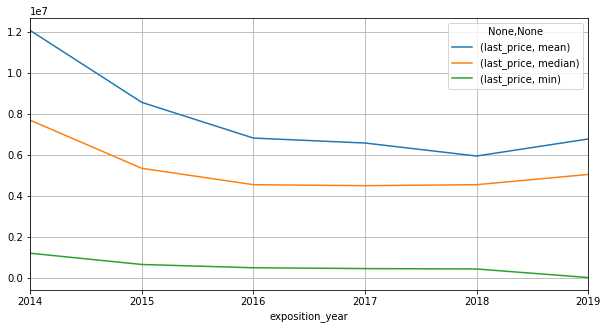

In [47]:
(data_exposition_year_stat
     .plot(grid=True, figsize=(10,5)))

In [48]:
data_exposition_year_max = real_estate_data.groupby('exposition_year').agg({'last_price': ['max']})

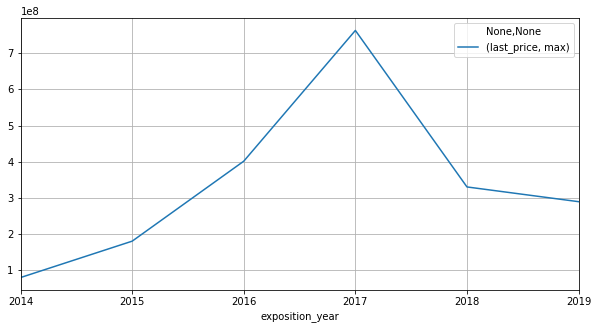

In [49]:
(data_exposition_year_max
     .plot(grid=True, figsize=(10,5)))

### Выводы о стоимости квартир по году публикации:
- Минимальная, средняя и медианная цены снижаются с 2014 по 2018 годы. В 2019 году начинатся небольшой рост
- Максимальная цена росла с 2014 по 2017 год, после чего снижается до 2019 года. В 2017 году заметный пик макс.цены.

### Зависимость цены от месяца

In [50]:
real_estate_data.groupby('exposition_month').agg({'last_price': ['mean','median', 'min', 'max']})

last_price                                  
                          mean     median       min          max
exposition_month                                                
1                 6.668233e+06  4600000.0  480000.0  180000000.0
2                 6.468500e+06  4650000.0  450000.0  401300000.0
3                 6.359275e+06  4650000.0   12190.0  289238400.0
4                 6.737198e+06  4800000.0  430000.0  330000000.0
5                 6.600435e+06  4515000.0  490000.0  230000000.0
6                 6.310269e+06  4400000.0  430000.0  124480000.0
7                 6.649337e+06  4650000.0  440000.0  140000000.0
8                 6.350233e+06  4570000.0  450000.0  159984000.0
9                 6.825470e+06  4700000.0  520000.0  763000000.0
10                6.235013e+06  4570000.0  600000.0  155000000.0
11                6.461363e+06  4700000.0  560000.0  160000000.0
12                7.011731e+06  4700000.0  490000.0  420000000.0

### Выводы о цене квартир по месяцам публикации объявления:
- Средняя цена выше в декабре, 
- медианная от месяца к месяцу не отличается, 
- минимальная цена выше в сентябре-ноябре (явно выделяющаяся цена 12190 - выброс),
- максимальные цены: пик в сентябре. 
- Посмотрим цены на графике

In [51]:
data_exposition_month_stat = real_estate_data.groupby('exposition_month').agg({'last_price': ['mean','median', 'min']})
data_exposition_month_max = real_estate_data.groupby('exposition_month').agg({'last_price': ['max']})

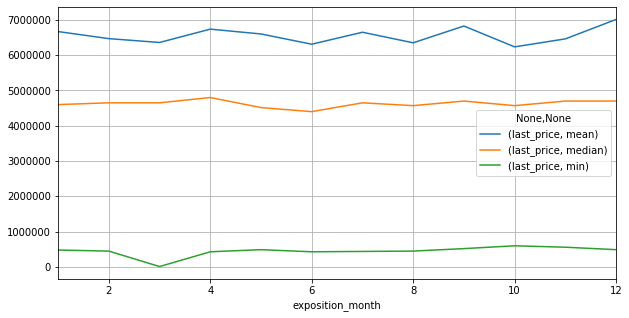

In [52]:
(data_exposition_month_stat
     .plot(grid=True, figsize=(10,5)))

### Выводы про минимум, медиану и среднюю цену из таблицы видны на графиках. Дополнительных отклонений не выявлено
### Отдельно посмотрим максимальную цену

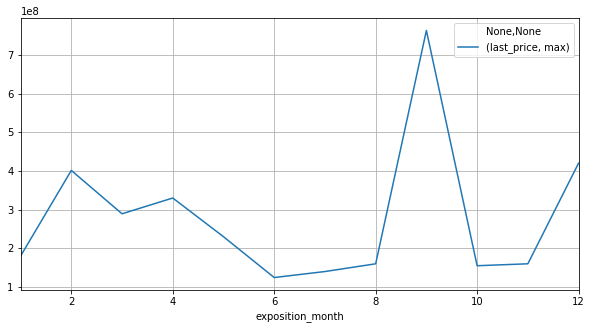

In [53]:
(data_exposition_month_max
     .plot(grid=True, figsize=(10,5)))

### Можно сделать вывод, что провал максимальной цены есть с июня по август, замет пик в сентябре, затем падение на октябрь-ноябрь, и снова пик в декабе

### Смотрим зависимость цены от дня недели

In [54]:
real_estate_data.groupby('exposition_day_of_week').agg({'last_price': ['mean','median', 'min', 'max']})

last_price                                  
                                mean     median       min          max
exposition_day_of_week                                                
0                       6.511613e+06  4650000.0  430000.0  300000000.0
1                       6.394233e+06  4730000.0  430000.0  289238400.0
2                       6.627970e+06  4700000.0   12190.0  420000000.0
3                       6.708663e+06  4650000.0  450000.0  159984000.0
4                       6.372131e+06  4585000.0  450000.0  190870000.0
5                       6.976804e+06  4555000.0  550000.0  763000000.0
6                       6.246180e+06  4550000.0  470000.0  130000000.0

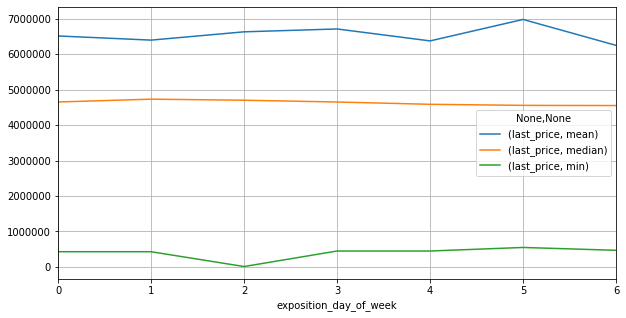

In [55]:
data_day_of_week_stat = real_estate_data.groupby('exposition_day_of_week').agg({'last_price': ['mean','median', 'min']})
(data_day_of_week_stat
     .plot(grid=True, figsize=(10,5)))

### Минимальная цена немного ниже во 2 день недели.
### Средняя цена немного выше на 5 день.

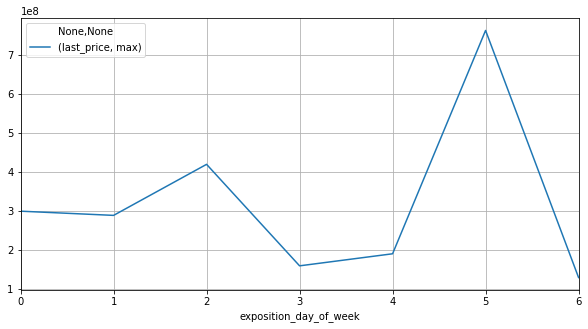

In [56]:
data_day_of_week_max = real_estate_data.groupby('exposition_day_of_week').agg({'last_price': ['max']})
(data_day_of_week_max
     .plot(grid=True, figsize=(10,5)))

### Максимальная цена - указывается ниже на 3 и 4 день недели, имеет пик на 5 день

## Выберите 10 населённых пунктов с наибольшим числом объявлений

In [57]:
data_locality_name_top = real_estate_data['locality_name'].value_counts(ascending=False).head(10)

In [58]:
data_locality_name_top

Санкт-Петербург      15721
посёлок Мурино         522
посёлок Шушары         440
Всеволожск             398
Пушкин                 369
Колпино                338
посёлок Парголово      327
Гатчина                307
деревня Кудрово        299
Выборг                 237
Name: locality_name, dtype: int64

##  Посчитайте среднюю цену квадратного метра в этих населённых пунктах
## Выделите населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце 'locality_name'

In [59]:
data_locality_name_top_list = pd.Series(['Санкт-Петербург','посёлок Мурино', 'посёлок Шушары', 'Всеволожск', 'Пушкин', 'Колпино', 
                                        'посёлок Парголово', 'Гатчина', 'деревня Кудрово', 'Выборг'])

In [60]:
real_estate_data.query('locality_name in @data_locality_name_top_list').head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,...,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,meter_price,exposition_year,exposition_month,exposition_day_of_week,floor_type,living_total_area,kitchen_total_area,total_area_group,last_price_group
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.000000,8,True,False,False,57.000000,0,Санкт-Петербург,...,16028.0,1.0,482.0,2.0,755.0,NaN,120370.370370,2019,3,3,другой,0.472222,0.527778,От_ 105.55,От 6800000.0 до 17687013.27
1,7,3350000.0,40.4,2018-12-04,1,NaN,11.0,18.600000,1,True,False,False,21.800000,2,посёлок Шушары,...,18603.0,0.0,NaN,0.0,NaN,81.000000,82920.792079,2018,12,1,первый,0.460396,0.539604,От 40.0 до 52.0,От 12190.0 до 3400000.0
2,10,5196000.0,56.0,2015-08-20,2,NaN,5.0,34.300000,4,True,False,False,21.700000,0,Санкт-Петербург,...,13933.0,1.0,90.0,2.0,574.0,451.727988,92785.714286,2015,8,3,другой,0.612500,0.387500,От 52.0 до 69.9,От 4650000.0 до 6800000.0
3,0,64900000.0,159.0,2015-07-24,3,NaN,14.0,90.785766,9,True,False,False,68.214234,0,Санкт-Петербург,...,6800.0,2.0,84.0,3.0,234.0,424.000000,408176.100629,2015,7,4,другой,0.570980,0.429020,От_ 105.55,От_ 17687013.27
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.000000,13,True,False,False,68.000000,0,Санкт-Петербург,...,8098.0,2.0,112.0,1.0,48.0,121.000000,100000.000000,2018,6,1,другой,0.320000,0.680000,От 69.9 до 105.55,От 6800000.0 до 17687013.27


In [61]:
real_estate_data.query('locality_name in @data_locality_name_top_list').groupby('locality_name').agg({'meter_price': ['mean']})

,meter_price
,mean
locality_name,
Всеволожск,68654.473986
Выборг,58141.909153
Гатчина,68746.146763
Колпино,75424.579098
Пушкин,103125.819291
Санкт-Петербург,114849.008794
деревня Кудрово,92473.547576
посёлок Мурино,85752.189195


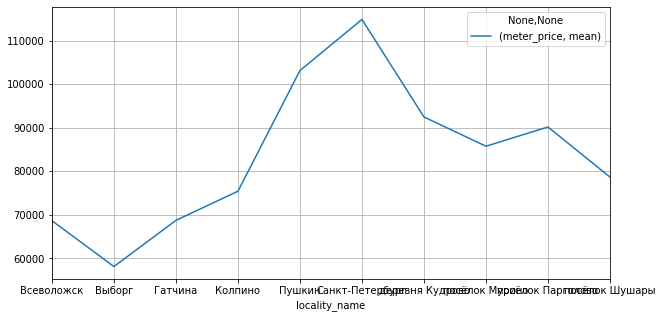

In [62]:
data_exposition_price_by_locality = real_estate_data.query('locality_name in @data_locality_name_top_list').groupby('locality_name').agg({'meter_price': ['mean']})
(data_exposition_price_by_locality
     .plot(grid=True, figsize=(10,5)))

### Самая низкая цена на квадратый метр в Выборе - 58141 руб
### Самая высокая цена в Санкт-Петербурге - 114849 руб

### Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге ('locality_name'). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. 

In [63]:
real_estate_data['kilometers_cityCenters_nearest'] = (real_estate_data['cityCenters_nearest']/1000).round()

In [64]:
data_spb = real_estate_data.query('locality_name == "Санкт-Петербург" & cityCenters_nearest.notnull()')

In [65]:
data_spb['kilometers_cityCenters_nearest'].describe()

count    15660.000000
mean        11.596041
std          4.863594
min          0.000000
25%          8.000000
50%         12.000000
75%         15.000000
max         29.000000
Name: kilometers_cityCenters_nearest, dtype: float64

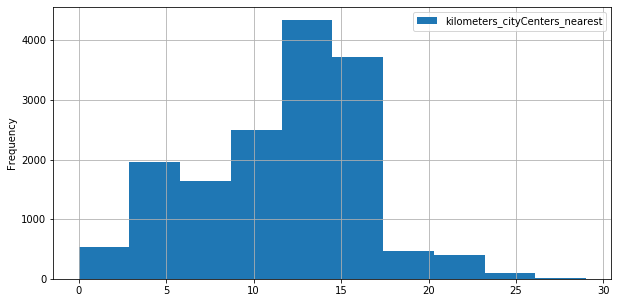

In [66]:
(data_spb
     .plot(kind='hist', y='kilometers_cityCenters_nearest', grid=True, figsize=(10,5)))

### В таблице с описанием максимальное расстояние до центра - 29 км
### Ни таблица ни график не дают представления о центре города

## После этого посчитайте среднюю цену для каждого километра. 

In [67]:
data_spb_price_per_km = data_spb.groupby('kilometers_cityCenters_nearest')['last_price'].mean()

In [68]:
data_spb_price_per_km

kilometers_cityCenters_nearest
0.0     3.144912e+07
1.0     2.120672e+07
2.0     1.778832e+07
3.0     1.112658e+07
4.0     1.330428e+07
5.0     1.449912e+07
6.0     1.533842e+07
7.0     1.477515e+07
8.0     9.957717e+06
9.0     6.950659e+06
10.0    6.504119e+06
11.0    6.250815e+06
12.0    5.828545e+06
13.0    6.083141e+06
14.0    5.629101e+06
15.0    5.884751e+06
16.0    5.373131e+06
17.0    5.292395e+06
18.0    5.091331e+06
19.0    5.037675e+06
20.0    5.951465e+06
21.0    5.493469e+06
22.0    5.415524e+06
23.0    4.985376e+06
24.0    3.854430e+06
25.0    4.052840e+06
26.0    3.973013e+06
27.0    8.300000e+06
28.0    5.026429e+06
29.0    4.236667e+06
Name: last_price, dtype: float64

### Постройте график: он должен показывать, как цена зависит от удалённости от центра. 

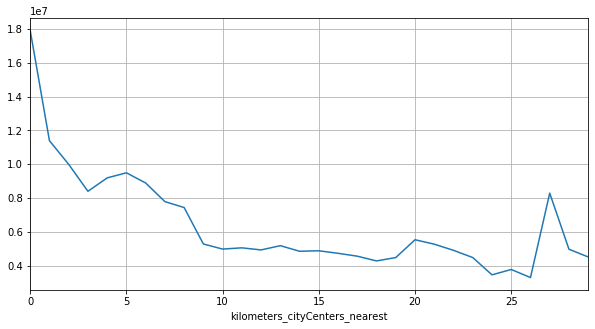

In [71]:
data_spb.groupby('kilometers_cityCenters_nearest')['last_price'].median().plot(grid=True, figsize=(10,5))

### Определите границу, где график сильно меняется — это и будет центральная зона.

### Вывод: Если все-таки график построился правильно, то резкое падение цены -  в районе 9 км от центра

## Строим график по средней цене квартир на каждом километре удаленности от центра в радиусе 9 км, что считаем центром

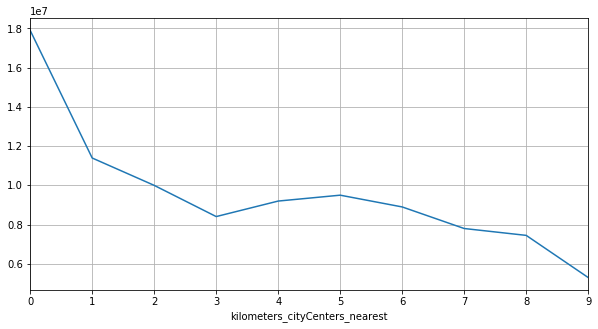

In [72]:
data_spb_center = data_spb.query('kilometers_cityCenters_nearest <= 9')
data_spb_price_per_km_center = data_spb_center.groupby('kilometers_cityCenters_nearest')['last_price'].median()
data_spb_price_per_km_center.plot(grid=True, figsize=(10,5))

### Вывод: 
- Чем ближе к центру, тем больше концентрация очень дорогих квартир. Пик цены - до 18 млн - наблюдается в радицсе 3 км.
- С 3 км до 8 км наблюдается плавное падение цен. 
- Резко падает цена в радиусе 9 км. 

### Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. 

### Центр Питера - в радиусе 9км. Смотрим параметры для квартир в центре

In [73]:
data_spb_center = data_spb.query('kilometers_cityCenters_nearest <= 9')
#data_spb_center.groupby('total_area'.agg({'cityCenters_nearest': ['mean','median']}
data_spb_center[['total_area','last_price', 'rooms', 'ceiling_height']].describe()

,total_area,last_price,rooms,ceiling_height
count,4715.000000,4.715000e+03,4715.000000,3078.000000
mean,86.437506,1.327110e+07,2.671050,3.025565
std,56.839196,2.224446e+07,1.393877,0.374768
min,12.000000,1.219000e+04,0.000000,2.500000
25%,51.000000,5.954074e+06,2.000000,2.750000
50%,72.600000,8.500000e+06,3.000000,3.000000
75%,102.000000,1.307500e+07,3.000000,3.200000
max,900.000000,7.630000e+08,19.000000,5.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f025f481590>,
      dtype=object)

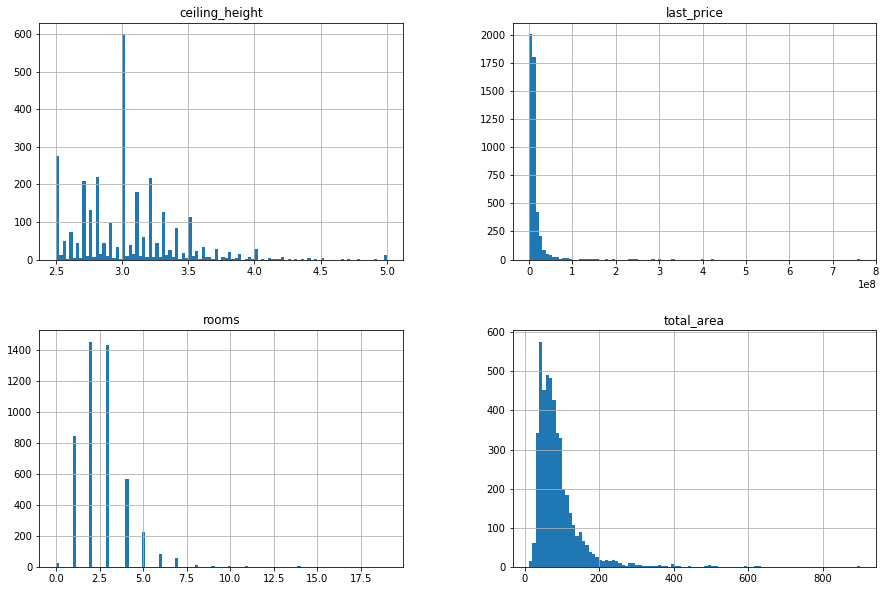

In [74]:
data_spb_center[['total_area','last_price', 'rooms', 'ceiling_height']].hist(bins=100, figsize=(15,10))

### Высота потолков в центре Санкт-Петербурга чаще около 3 м, цена в среднем около 13 млн, обычно от 1 до 3 комнат, площать в среднем до 86 кв.м.

### Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). 

In [75]:
data_spb_center[['rooms', 'floor', 'cityCenters_nearest', 'first_day_exposition']].describe()

,rooms,floor,cityCenters_nearest
count,4715.000000,4715.000000,4715.000000
mean,2.671050,4.628632,5552.723860
std,1.393877,3.503097,2290.160063
min,0.000000,1.000000,181.000000
25%,2.000000,2.000000,4030.500000
50%,3.000000,4.000000,5299.000000
75%,3.000000,6.000000,7522.500000
max,19.000000,25.000000,9496.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f025c908510>,
      dtype=object)

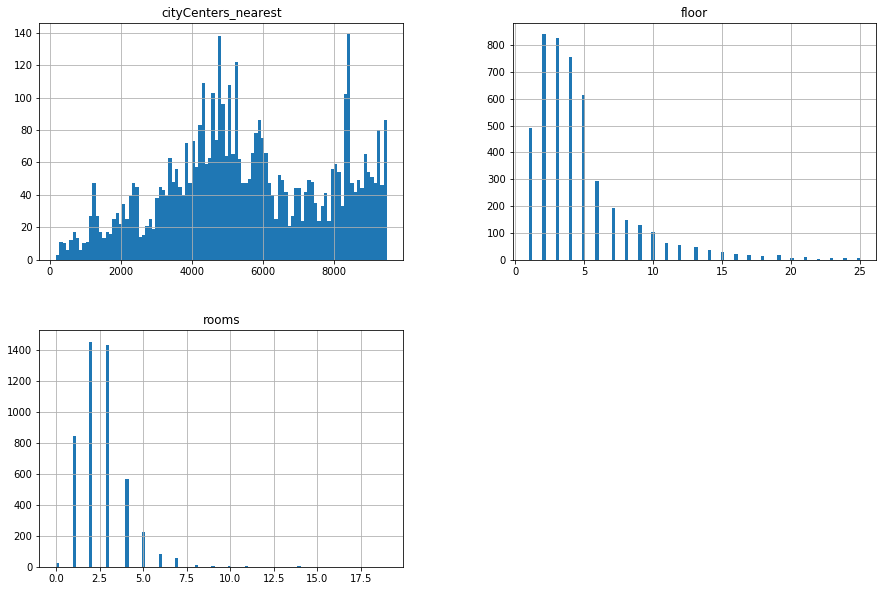

In [76]:
data_spb_center[['rooms', 'floor', 'cityCenters_nearest', 'first_day_exposition']].hist(bins=100,figsize=(15,10))

###  Сделайте выводы. Отличаются ли они от общих выводов по всему городу?

### Вспомним данные по всем объявлениям в Спб

In [77]:
data_spb[['total_area','last_price', 'rooms', 'ceiling_height','rooms', 'floor', 'cityCenters_nearest', 'first_day_exposition']].describe()

,total_area,last_price,rooms,ceiling_height,rooms,floor,cityCenters_nearest
count,15660.000000,1.566000e+04,15660.000000,10073.000000,15660.000000,15660.000000,15660.000000
mean,64.658142,8.032783e+06,2.171073,2.767191,2.171073,6.242720,11601.291571
std,40.222451,1.296998e+07,1.146765,0.311136,1.146765,4.901524,4842.035279
min,12.000000,1.219000e+04,0.000000,2.500000,0.000000,1.000000,181.000000
25%,42.000000,4.200000e+06,1.000000,2.550000,1.000000,3.000000,8327.000000
50%,55.000000,5.500000e+06,2.000000,2.700000,2.000000,5.000000,12244.500000
75%,74.500000,8.130000e+06,3.000000,2.850000,3.000000,8.000000,14943.000000
max,900.000000,7.630000e+08,19.000000,5.000000,19.000000,33.000000,29493.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f025ed6fcd0>,
      dtype=object)

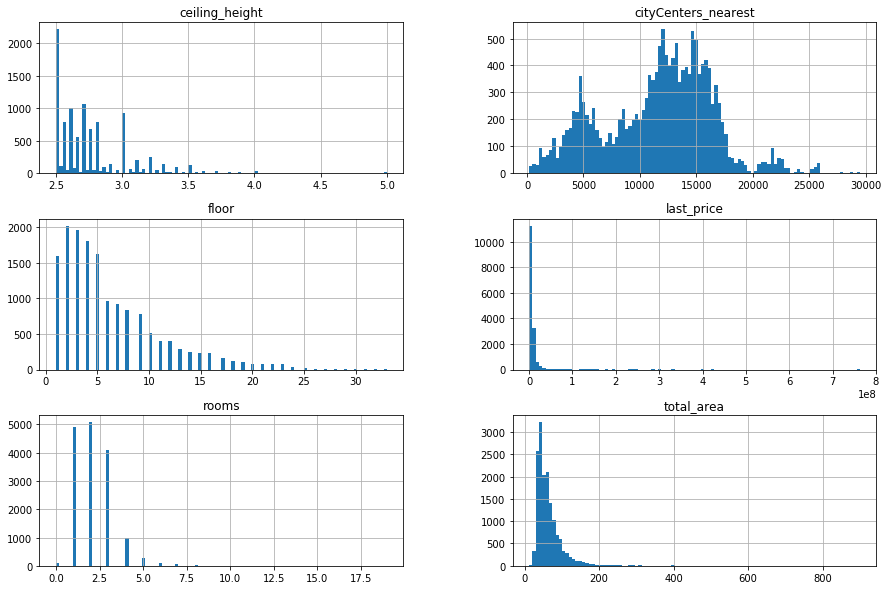

In [78]:
data_spb[['total_area','last_price', 'rooms', 'ceiling_height', 'floor', 'cityCenters_nearest', 'first_day_exposition']].hist(bins=100,figsize=(15,10))

### Выводы о квартирах в центре Санкт-Петербурга:
- расстояние до центра - согласно ограничению в 9 км.
- Высота потолков в центре Санкт-Петербурга чаще около 3 м, 
- цена в среднем около 13 млн,
- обычно от 1 до 3 комнат
- площать в среднем до 86 кв.м
- этажи - в центре малоэтажная застройка. Больше всего квартир в домах до 5 этажей, и резко убывающий тренд до 25 км.


### Средние показатели в Санкт-Петербурге в целом
- высота потолков чаще 2,5 м
- средняя цена 8 млн
- количество комнат - от 1 до 4, чаще всего 2 комнаты
- площадь в среднем 64 кв.м.
- этажность - преобладают 5-этажки, также есть сегмент домов до 10 этажей, и убывающий тренд до 2 этажей.


### В центре города:
- значительно больше квартир с высокой стоимостью 
- потолки выше - 3 м против 2,5 по всему Спб
- площадь квартир в среднем больше - 86 кв м против 64 кв м по всему Спб
- преобладает низкоэтажная застройка - 5-этажки
- средняя цена на квартиру - 13 млн против 8 млн в среднем по Спб


### Самая низкая цена на квадратый метр в Выборе - 58141 руб
### Самая высокая цена в Санкт-Петербурге - 114849 руб

## Шаг 5. Общий вывод

### Динамика стоимости квартир по году публикации:
- Минимальная, средняя и медианная цены снижаются с 2014 по 2018 годы. В 2019 году начинатся небольшой рост
- Максимальная цена росла с 2014 по 2017 год, после чего снижается до 2019 года. В 2017 году заметный пик макс.цены. 

### Цены квартир отличаются в зависимости от месяца публикации объявления:
- минимальная цена выше в сентябре-ноябре,
- максимальные цены указываются в сентябре,
- средняя цена выставляемой на продажу квартиры выше в декабре.

### Факторы, влияющие на стоимость квартиры:

### С увеличением стоимости явно уменьшается расстояние до центра
- При стоимости до 3,4 млн среднее расстояние до центра - 20,5км
- При стоимости от 3,4 млн до 4.65 млн - 16км
- От 4,65 до 6.8 - 14 км
- От 6,8 до 17,6 млн - 10 км
- от 17,6 млн - 6.6 км


### Чем больше общая площадь и число комнат, тем выше стоимость:
- При стоимости до 3,4 млн средняя площадь - 40кв.м. и 1 комната
- При стоимости от 3,4 млн до 4.65 млн - 45 кв.м, и 2 комнаты
- От 4,65 до 6.8 - 58 кв.м, и 2 комнаты
- От 6,8 до 17,6 млн - 84 кв.м, и 3 комнаты
- от 17,6 млн - 146 кв.м. и 4 комнаты 


### Этажность влияет на стоимость
- первые этажи дешевле всего - в среднем 4.80 млн
- последние этажи дороже всего	- от 7.36 млн
- не первый и не последний - в среднем	6.675444e+06


### В источнике данных есть стандартный срок размещения объявлений
- со значениями 7, 30, 46, 60 и 90 дней, и из них чаще всего выбирают 45 и 60. 

### Самая низкая цена на квадратый метр в Выборе - 58141 руб
### Самая высокая цена в Санкт-Петербурге - 114849 руб

### Отличия параметров квартирв в центре Санкт-Петербурга и в целом по городу:
- значительно больше квартир с высокой стоимостью 
- потолки выше - 3 м против 2,5 по всему Спб
- площадь квартир в среднем больше - 86 кв м против 64 кв м по всему Спб
- преобладает низкоэтажная застройка - 5-этажки
- средняя цена на квартиру - 13 млн против 8 млн в среднем по Спб


### Проведена работа с данными
#### Предобработка данных
- Для анализа были очищены крайние значения площади, цены, числа комнат, высоты потолков.
- Заполнены пропущенные значения площади кухни и жилой площади. 
- Жилая площадь заполнена по среднему значению доли жилой площади от общей.
- Площадь кухни вычислена путем вычитания жилой площади из общей.

#### Изменение типов данных
- балконы - чтобы можно было делать математические операции
- дату публикации - так как нужно будет работать с ней как с датой
- is_apartment - заполнен как bool, тип должен быть другой

#### Посчитано и добавлано в таблицу
- цену квадратного метра - meter_price
- день недели, месяц и год публикации объявления
- этаж квартиры; варианты — первый, последний, другой
- соотношение жилой и общей площади, а также отношение площади кухни к общей

#### Исследовательский анализ данных
- Изучены следующие параметры: площадь, цена, число комнат, высота потолков. Постройте гистограммы для каждого параметра.
- Изучено Среднее время продажи
- Изучена зависимость цены от квадратного метра, числа комнат, этажа (первого или последнего), удалённости от центра.
- Изучена зависимость от даты размещения: дня недели, месяца и года
- Выбраны 10 населённых пунктов с наибольшим числом объявлений
- Посчитана средняя цена квадратного метра в этих населённых пунктах
- Выделены населённые пункты с самой высокой и низкой стоимостью жилья
- Изучены предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге 
- Построен график по средней цене квартир на каждом километре удаленности от центра в радиусе 9 км, что считаем центром
- Выделен сегмент квартир в центре. Проанализирована эта территория и изучены следующие параметры: площадь, цена, число комнат, высота потолков.


### Чек-лист готовности проекта

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод info())
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения
- [x]  есть пояснение какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение в каких столбцах изменены типы и почему
- [x]  посчитано и добавлено в таблицу: цена квадратного метра
- [x]  посчитано и добавлено в таблицу: день недели, месяц и год публикации объявления
- [x]  посчитано и добавлено в таблицу: этаж квартиры; варианты — первый, последний, другой
- [x]  посчитано и добавлено в таблицу: соотношение жилой и общей площади, а также отношение площади кухни к общей
- [x]  изучены следующие параметры: площадь, цена, число комнат, высота потолков
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?"
- [x]  выполнено задание: "Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили."
- [x]  выполнено задание: "Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от квадратного метра, числа комнат, этажа (первого или последнего), удалённости от центра. Также изучите зависимость от даты размещения: дня недели, месяца и года. "Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце '*locality_name'*. "
- [x]  выполнено задание: "Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге (*'locality_name'*). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона. "
- [x]  выполнено задание: "Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всему городу?"
- [x]  в каждом этапе есть выводы
- [x]  есть общий вывод